## 1. DecisionTreeClassifier 연습문제

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X1 = iris.data
y1 = iris.target
X1 = X1[:, :2]
feature_names = iris.feature_names[:2]


from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X1, y1)
y1_pred = model1.predict(X1)

from sklearn.metrics import accuracy_score

accuracy_score(y1, y1_pred)

0.8066666666666666

In [42]:
!pip install pydot

In [3]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

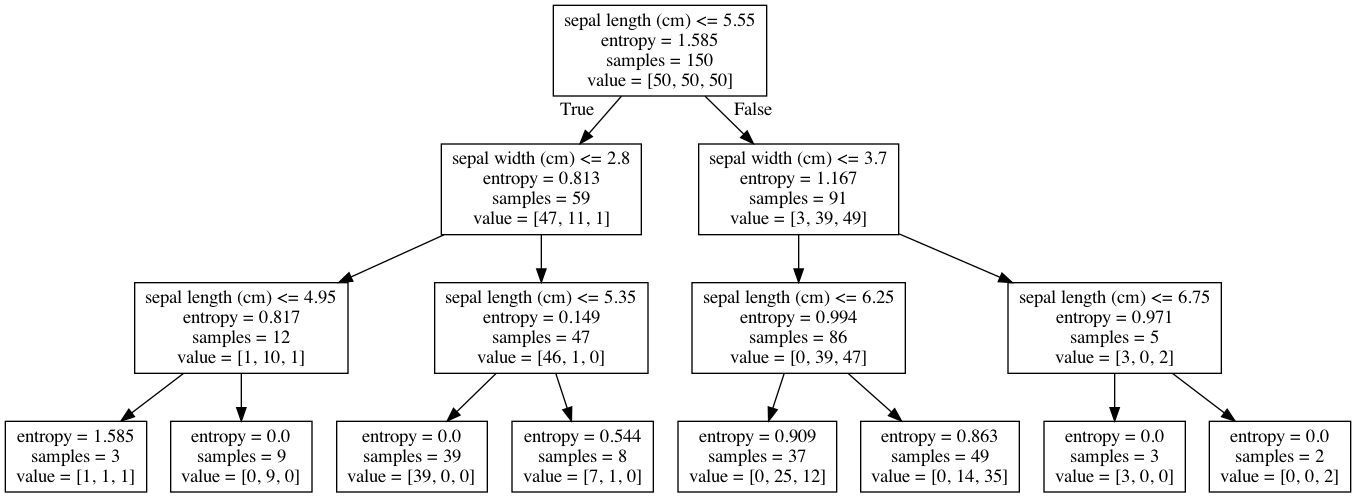

In [4]:
draw_decision_tree(model1)

In [5]:
plot_decision_regions(X1, y1, model1, "Depth 3")
plt.show()

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y1, y1_pred)

array([[50,  0,  0],
       [ 2, 34, 14],
       [ 1, 12, 37]])

In [7]:
from sklearn.metrics import classification_report 
print(classification_report(y1, y1_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       0.74      0.68      0.71        50
           2       0.73      0.74      0.73        50

    accuracy                           0.81       150
   macro avg       0.80      0.81      0.80       150
weighted avg       0.80      0.81      0.80       150



## 2. K=5 인 교차검증

In [10]:
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(5, shuffle=True, random_state=0)
cross_val_score(model1, X1, y1, scoring='accuracy', cv=cv).mean()

0.6599999999999999

## cross validation

In [38]:
from sklearn.model_selection import cross_val_score

cross_val_score(model1, X1, y1, scoring='accuracy', cv=5).mean()

0.7466666666666666

In [17]:
%matplotlib inline

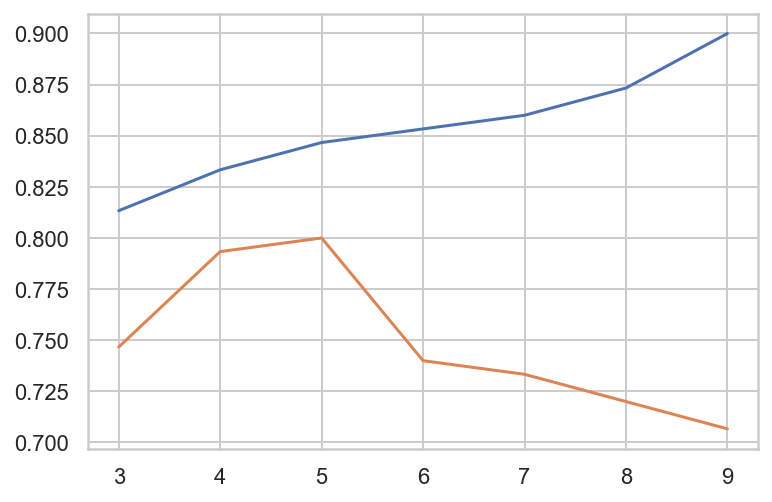

In [20]:
mean_test_accuracy = []
train_accuracy = []

for max_depth in np.arange(3, 10):
    model1 = DecisionTreeClassifier(max_depth=max_depth).fit(X1, y1)
    train_accuracy.append(accuracy_score(y1, model1.predict(X1)))
    mean_test_accuracy.append(cross_val_score(model1, X1, y1, scoring='accuracy', cv=5).mean())
    

plt.plot(np.arange(3, 10), train_accuracy)
plt.plot(np.arange(3, 10), mean_test_accuracy)
plt.show()